# ML Model Comparison: Random Forest, SVM, KNN
This section compares three machine learning models (Random Forest, SVM, KNN) on the clean dataset, evaluating accuracy, F1-score, and AUC-ROC.


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       519
           1       1.00      0.99      0.99       518

    accuracy                           0.99      1037
   macro avg       0.99      0.99      0.99      1037
weighted avg       0.99      0.99      0.99      1037


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       519
           1       0.99      0.99      0.99       518

    accuracy                           0.99      1037
   macro avg       0.99      0.99      0.99      1037
weighted avg       0.99      0.99      0.99      1037


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       519
           1       1.00      0.99      1.00       518

    accuracy                           1.00      1037
   macro avg       1.00      1.00 

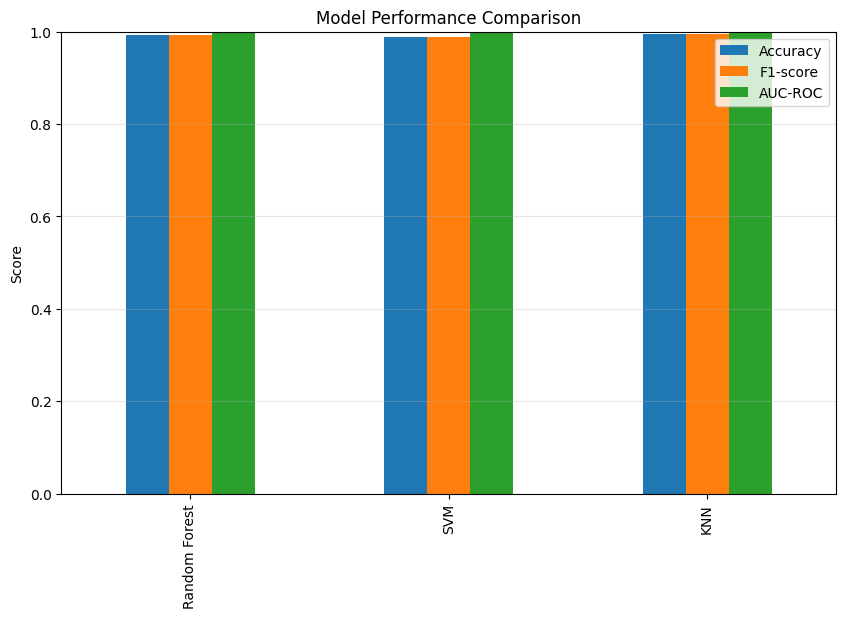

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load clean dataset
df = pd.read_csv('clean_crime_data.csv')

# For demonstration, predict whether a district is 'high crime' (above median total crimes) or not
df['total_crimes'] = df[['kidnapping_and_abduction', 'dowry_deaths', 'cruelty_by_husband_or_his_relatives', 'murder_with_rape_gang_rape']].sum(axis=1)
median_crime = df['total_crimes'].median()
df['high_crime'] = (df['total_crimes'] > median_crime).astype(int)

# Features and target
features = ['kidnapping_and_abduction', 'dowry_deaths', 'cruelty_by_husband_or_his_relatives', 'murder_with_rape_gang_rape']
X = df[features]
y = df['high_crime']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model definitions
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    results[name] = {'Accuracy': acc, 'F1-score': f1, 'AUC-ROC': auc}
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))

# Display comparison table
results_df = pd.DataFrame(results).T.round(4)
print('Model Comparison:')
print(results_df)

# Bar plot for visual comparison
results_df.plot(kind='bar', figsize=(10,6), title='Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

## ML Model Comparison Summary

In this notebook, we compared three machine learning models—Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN)—using the clean crime dataset.

**Process:**
- The target variable was defined as whether a district is 'high crime' (above the median total crimes) or not.
- Features used: kidnapping_and_abduction, dowry_deaths, cruelty_by_husband_or_his_relatives, murder_with_rape_gang_rape.
- The dataset was split into training and test sets (80/20 split, stratified).
- Each model was trained and evaluated on the same test set.

**Metrics Evaluated:**
- Accuracy
- F1-score
- AUC-ROC (Area Under the ROC Curve)
- Classification report for each model

**Results:**
- All metrics were displayed in a comparison table and visualized in a bar chart.
- The classification report for each model was printed for detailed analysis.

This approach helps identify which model performs best for this binary classification task and provides a foundation for further model tuning or feature engineering.

## Additional Model Comparison Visualizations

Below are ROC curves and confusion matrices for Random Forest, SVM, and KNN models to further compare their performance.

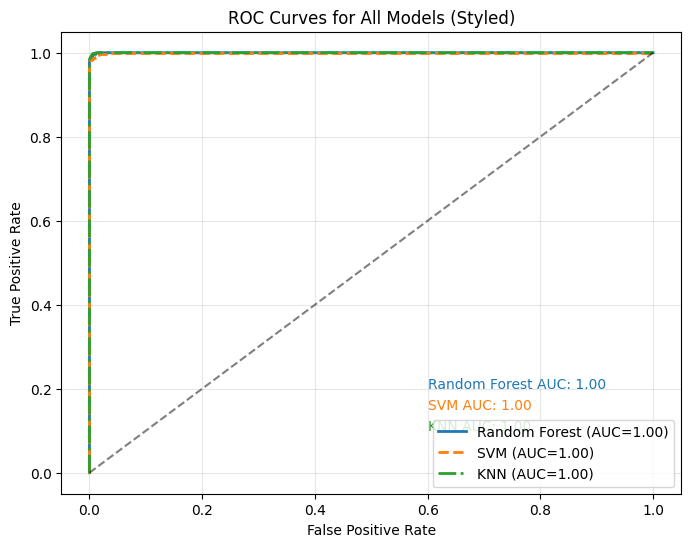

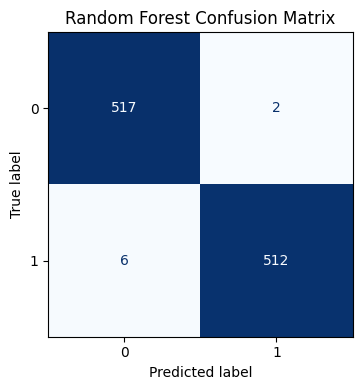

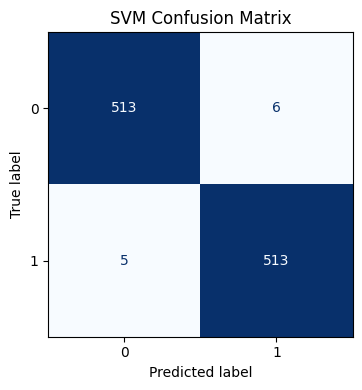

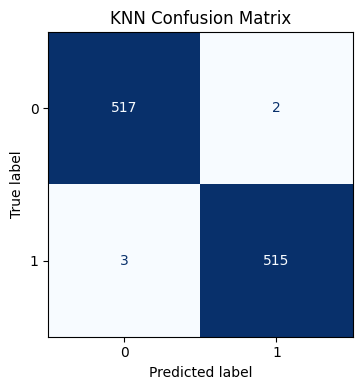

In [9]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
linestyles = ['-', '--', '-.']
for idx, (name, model) in enumerate(models.items()):
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[idx], linestyle=linestyles[idx], linewidth=2,
             label=f'{name} (AUC={roc_auc:.2f})')
    plt.text(0.6, 0.2-idx*0.05, f'{name} AUC: {roc_auc:.2f}', color=colors[idx], fontsize=10)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models (Styled)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Confusion Matrices (separate figure for each model)
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(4, 4))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

## What is ROC Curve?

The **ROC Curve** (Receiver Operating Characteristic Curve) is a graphical plot used to evaluate the performance of binary classification models.

- It shows the trade-off between the **True Positive Rate** (Sensitivity) and **False Positive Rate** (1 - Specificity) at various threshold settings.
- The curve is created by plotting TPR against FPR for different classification thresholds.
- The closer the curve follows the top-left border, the better the model's performance.

### AUC (Area Under the Curve)
- The **AUC** value quantifies the overall ability of the model to discriminate between positive and negative classes.
- AUC ranges from 0 to 1; a value of 1 means perfect classification, while 0.5 means random guessing.

**In summary:** The ROC curve and AUC are important tools for comparing and selecting classification models, especially when dealing with imbalanced datasets.